In [ ]:
# Goal: Try to Explore the relations of Spending Score with Other Features

# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import accuracy_score
from category_encoders import OrdinalEncoder

#Import Model Packages 
from sklearn.model_selection import train_test_split



! pip install --upgrade category_encoders


# Prepare Data

In [48]:
train_df = pd.read_csv("/Users/loufuhao/Desktop/Train.csv")

In [4]:
test_df = pd.read_csv("/Users/loufuhao/Desktop/Test.csv")

In [5]:
df = pd.concat([train_df,test_df])
print("df shape:", df.shape)
df.head(10)


df shape: (10695, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [8]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [30]:
df=df.dropna()
df.drop(['Var_1', 'Segmentation'], axis=1, inplace=True)
df.drop(['ID'], axis=1, inplace=True)

In [16]:
print('Null Values =',df.isnull().values.any())

Null Values = False


#  Description and Visualization

## Just Play Around the Data Assoicated with High Spending Score 

In [19]:
mask = df["Spending_Score"] =="High"
df_High = df[mask]
df_High.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
19,464291,Female,Yes,79,Yes,Artist,0.0,High,1.0,Cat_6,C
34,459861,Female,Yes,83,No,Lawyer,1.0,High,2.0,Cat_6,D
62,464091,Male,Yes,74,Yes,Lawyer,0.0,High,3.0,Cat_6,D
63,464535,Male,Yes,56,Yes,Lawyer,1.0,High,2.0,Cat_6,A


Text(0.5, 1.0, 'Spending Score (High): Age Distribution')

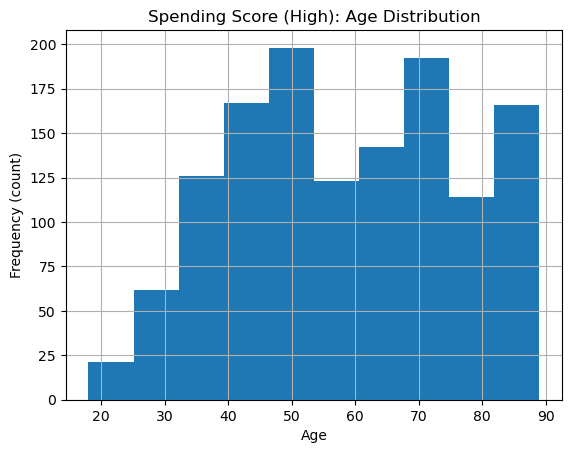

In [31]:
df_High["Age"].hist(bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency (count)")
plt.title("Spending Score (High): Age Distribution")

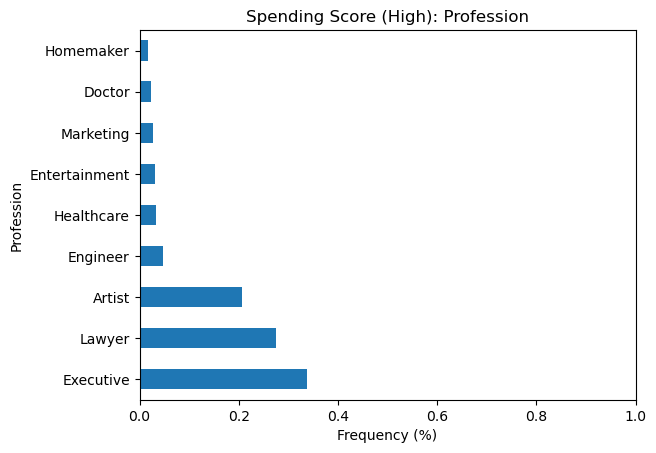

In [32]:
Profession_value_counts = df_High["Profession"].value_counts(normalize=True)
Profession_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Profession")
plt.title("Spending Score (High): Profession");

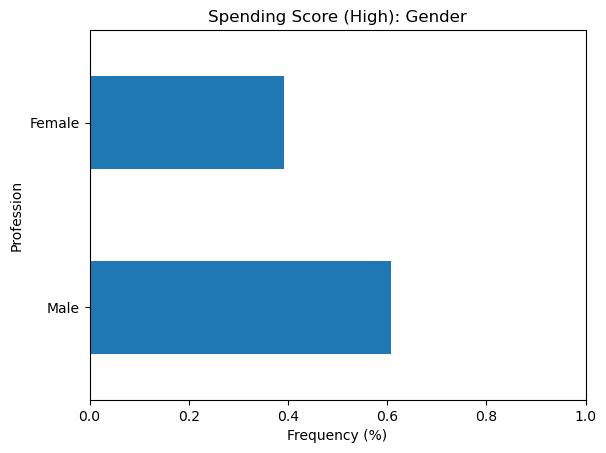

In [29]:
Gender_value_counts = df_High["Gender"].value_counts(normalize=True)
Gender_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Profession")
plt.title("Spending Score (High): Gender");

In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8819 entries, 0 to 2626
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8819 non-null   object 
 1   Ever_Married     8819 non-null   object 
 2   Age              8819 non-null   int64  
 3   Graduated        8819 non-null   object 
 4   Profession       8819 non-null   object 
 5   Work_Experience  8819 non-null   float64
 6   Spending_Score   8819 non-null   object 
 7   Family_Size      8819 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 620.1+ KB
None


In [34]:
Spending_Score = {'Low':0,'Average':1,'High':2}
df['Spending_Score'] = df['Spending_Score'].map(Spending_Score)

In [36]:
print(df["Spending_Score"].value_counts())

0    5325
1    2183
2    1311
Name: Spending_Score, dtype: int64


In [98]:
df.head(10)


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,0,4.0
2,Female,Yes,67,Yes,Engineer,1.0,0,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,2,2.0
5,Male,Yes,56,No,Artist,0.0,1,2.0
6,Male,No,32,Yes,Healthcare,1.0,0,3.0
7,Female,No,33,Yes,Healthcare,1.0,0,3.0
8,Female,Yes,61,Yes,Engineer,0.0,0,3.0
9,Female,Yes,55,Yes,Artist,1.0,1,4.0
10,Female,No,26,Yes,Engineer,1.0,0,3.0
11,Male,No,19,No,Healthcare,4.0,0,4.0


<AxesSubplot:>

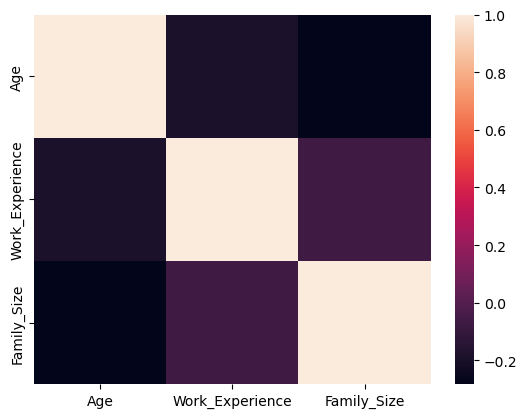

In [38]:
correlation = df.select_dtypes("number").drop(columns="Spending_Score").corr()
sns.heatmap(correlation)

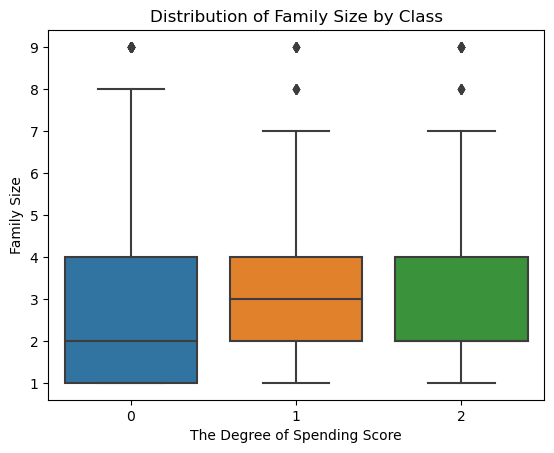

In [40]:
sns.boxplot(x="Spending_Score",y="Family_Size",data=df)

plt.xlabel("The Degree of Spending Score")
plt.ylabel("Family Size")
plt.title("Distribution of Family Size by Class");

In [41]:
df.select_dtypes("object").nunique()

Gender          2
Ever_Married    2
Graduated       2
Profession      9
dtype: int64

# Split Data

In [43]:
target = "Spending_Score"
X = df.drop(columns=target)
y = df[target]

In [70]:
X_train, X_testl, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=32
)

In [71]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=32
)

# Build Model

In [72]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.6


# Iteration

In [108]:
model = make_pipeline(
      OrdinalEncoder(),DecisionTreeClassifier(max_depth=7,random_state=32)
)
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Gender', 'Ever_Married', 'Graduated',
                                      'Profession'],
                                mapping=[{'col': 'Gender',
                                          'data_type': dtype('O'),
                                          'mapping': Female    1
Male      2
NaN      -2
dtype: int64},
                                         {'col': 'Ever_Married',
                                          'data_type': dtype('O'),
                                          'mapping': No     1
Yes    2
NaN   -2
dtype: int64},
                                         {'col': 'Graduated',
                                          'data_type': dtype('O'),
                                          'mapping': Yes    1
No     2
NaN   -2
dtype: int64},
                                         {'col': 'Profession',
                                          'data_type': dtype('O'),
                        

In [109]:
acc_train = accuracy_score(y_train,model.predict(X_train))
acc_val = model.score(X_val,y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 0.82
Validation Accuracy: 0.82


In [110]:
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 7


In [114]:
depth_hyperparams = range(1,11,1)

training_acc = []
validation_acc = []

for d in depth_hyperparams:
    test_model = make_pipeline(
      OrdinalEncoder(), DecisionTreeClassifier(max_depth=d,random_state=32)
    )
    test_model.fit(X_train, y_train)
    training_acc.append(test_model.score(X_train,y_train))
    validation_acc.append(test_model.score(X_val,y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.6498936924167257, 0.72537207654146, 0.783309709425939]
Validation Accuracy Scores: [0.6697377746279235, 0.7420269312544295, 0.7944720056697377]


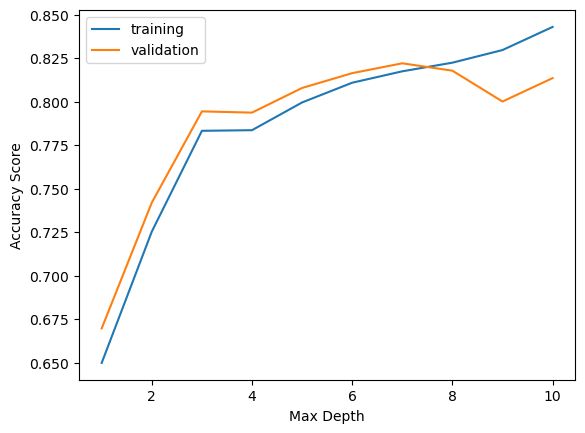

In [115]:
plt.plot(depth_hyperparams,training_acc,label="training")
plt.plot(depth_hyperparams,validation_acc,label="validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

# Evaluation

In [116]:
test_acc = model.score(X_test,y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.82


In [117]:
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:7])
print("Importances:", importances[:7])

Features: Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Family_Size'],
      dtype='object')
Importances: [0.00837541 0.54149222 0.05419662 0.00357877 0.18855199 0.00544716
 0.19835784]


In [103]:
pd.Index.size!=len(features)

True

# Communication

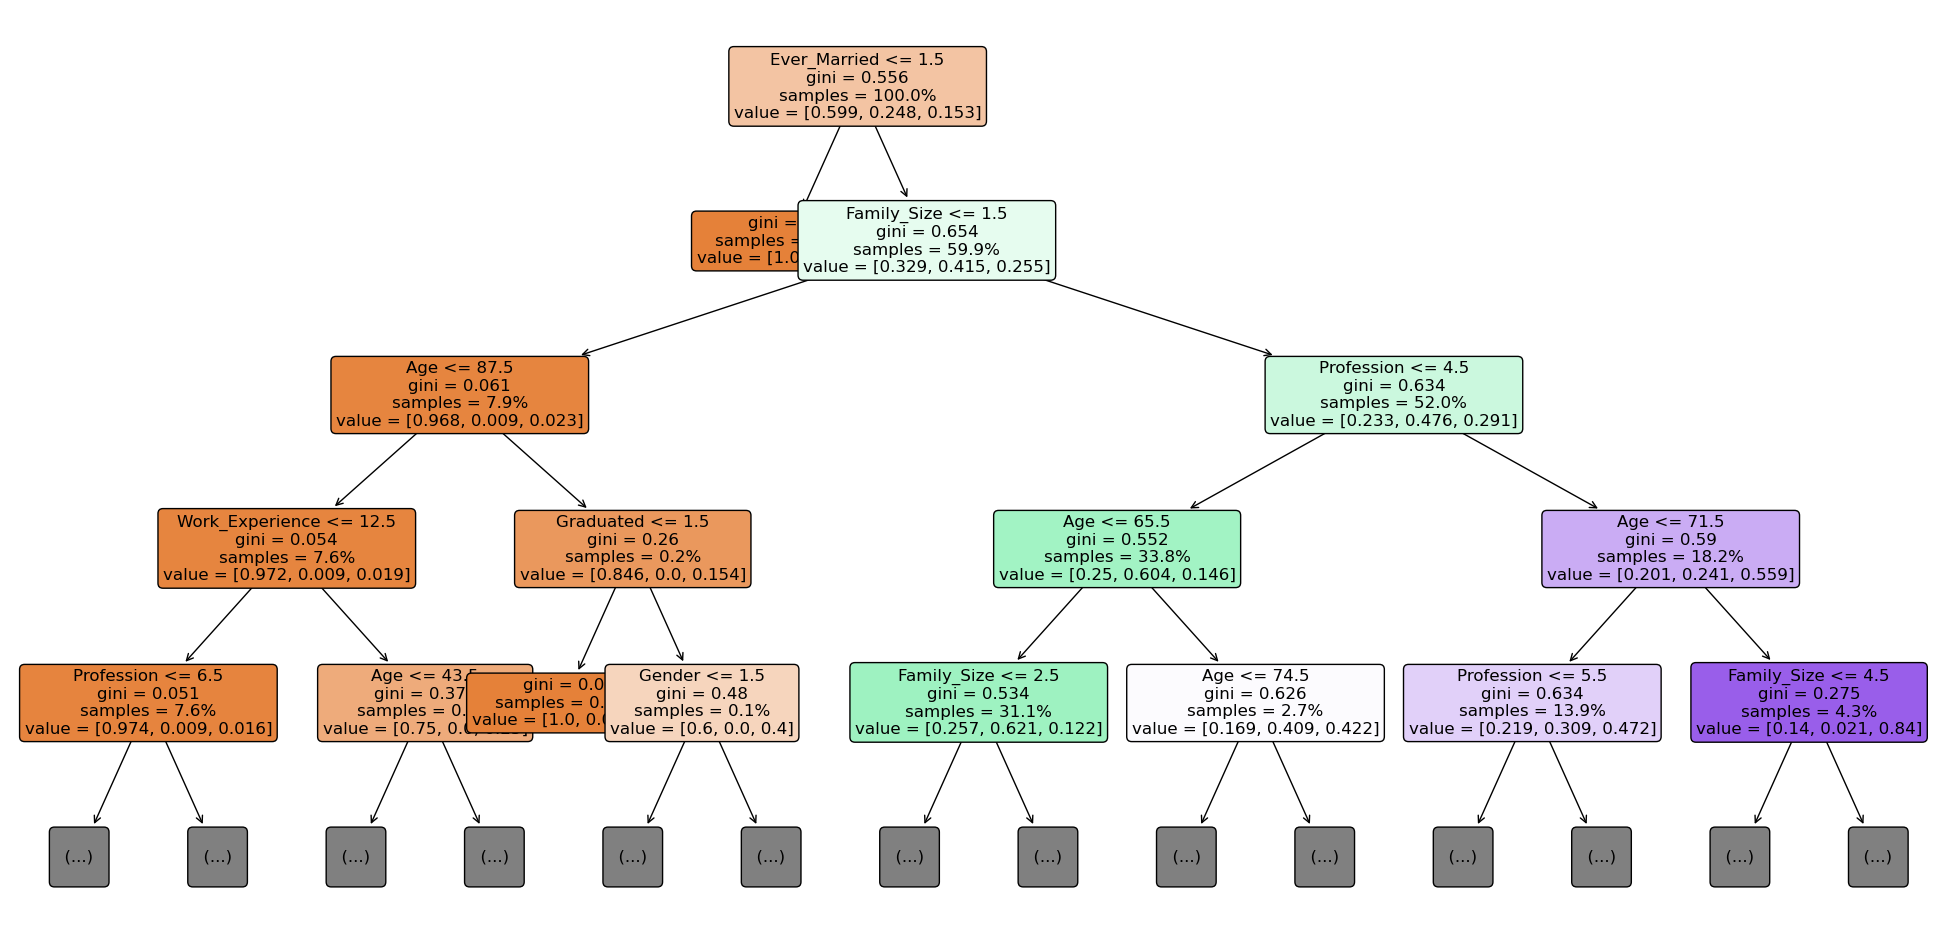

In [122]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns,
    filled=True, 
    rounded=True,  
    proportion=True, 
    max_depth=4, 
    fontsize=12,  
    ax=ax,  
);


In [126]:
feat_imp = pd.Series(importances,index=features).sort_values()
feat_imp.head(7)

Graduated          0.003579
Work_Experience    0.005447
Gender             0.008375
Age                0.054197
Profession         0.188552
Family_Size        0.198358
Ever_Married       0.541492
dtype: float64

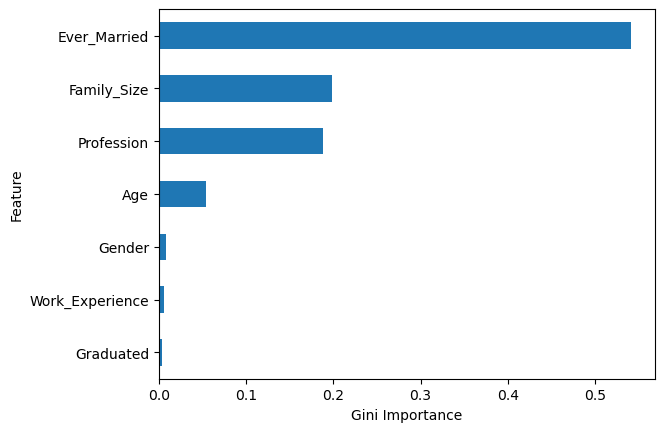

In [125]:
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");

In [ ]:
# The feature Ever_Married representing "if this customer had a history of marriage" has been shown 
# as the most important feature for the level of Spending Score. 
# Its Gini number exceeds 0.5 as the highest, meaning that the feature is responsible for about 55% for increasing
# the purity in the node.